In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Paths
train_path = "D:\\data conquest\\ESOPHEGEAL CANCER DETECTION\\advanced_preprocessed_images"  # Adjust the path accordingly

# Data Preprocessing with ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training and Validation Generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)




Found 6770 images belonging to 2 classes.
Found 1692 images belonging to 2 classes.


In [2]:
# Load InceptionV3 Model (Pre-trained on ImageNet)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing initial layers
for layer in base_model.layers:
    layer.trainable = False

# Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)  # Dropout to prevent overfitting
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)  # Additional dropout
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [3]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)

Epoch 1/10
211/211 [==============================] - 298s 1s/step - loss: 0.5574 - accuracy: 0.7069 - val_loss: 0.4608 - val_accuracy: 0.7885
Epoch 2/10
211/211 [==============================] - 310s 1s/step - loss: 0.4752 - accuracy: 0.7772 - val_loss: 0.4515 - val_accuracy: 0.7855
Epoch 3/10
211/211 [==============================] - 305s 1s/step - loss: 0.4568 - accuracy: 0.7799 - val_loss: 0.4176 - val_accuracy: 0.8059
Epoch 4/10
211/211 [==============================] - 318s 2s/step - loss: 0.4297 - accuracy: 0.8062 - val_loss: 0.4211 - val_accuracy: 0.8041
Epoch 5/10
211/211 [==============================] - 293s 1s/step - loss: 0.4280 - accuracy: 0.8022 - val_loss: 0.4154 - val_accuracy: 0.8113
Epoch 6/10
211/211 [==============================] - 295s 1s/step - loss: 0.4264 - accuracy: 0.7985 - val_loss: 0.4208 - val_accuracy: 0.8059
Epoch 7/10
211/211 [==============================] - 313s 1s/step - loss: 0.4197 - accuracy: 0.8069 - val_loss: 0.3969 - val_accuracy: 0.8233

In [4]:
model.save("D:\\data conquest\\ESOPHEGEAL CANCER DETECTION\\models\\InceptionV3_base_augumented.h5")

c:\Users\Sri Aravindh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


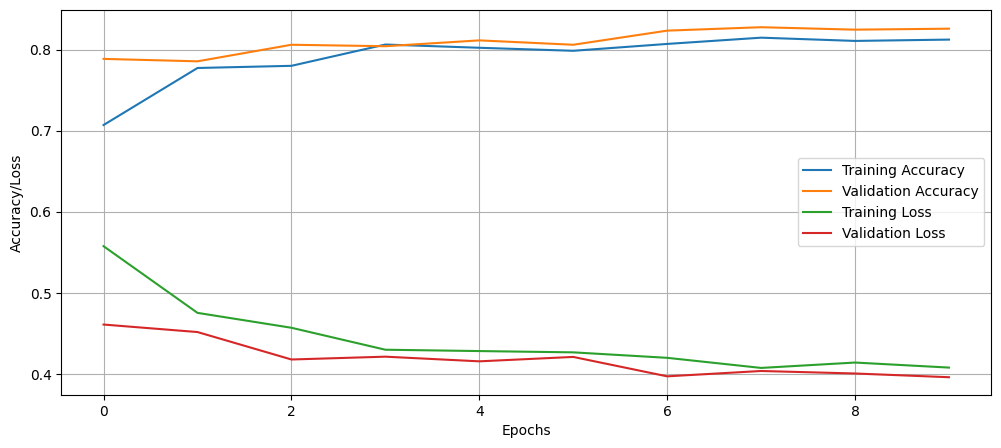

In [5]:
# Plotting Training and Validation Curves
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.grid()
plt.show()


In [6]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


53/53 [==============================] - 67s 1s/step - loss: 0.3943 - accuracy: 0.8286
Validation Loss: 0.3943
Validation Accuracy: 82.86%


In [7]:
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = 'D:\\data conquest\\ESOPHEGEAL CANCER DETECTION\\models\\InceptionV3_base_augumented.h5'

# Load the model
model = load_model(model_path)

# Verify the model structure
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

53/53 [==============================] - 67s 1s/step - loss: 0.3946 - accuracy: 0.8333
Validation Loss: 0.39460399746894836
Validation Accuracy: 0.8333333134651184
53/53 [==============================] - 67s 1s/step

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42       846
           1       0.48      0.57      0.52       846

    accuracy                           0.48      1692
   macro avg       0.48      0.48      0.47      1692
weighted avg       0.48      0.48      0.47      1692



C:\Users\Sri Aravindh\AppData\Local\Temp\ipykernel_28832\3156034360.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Non-Diseased', 'Diseased'])
C:\Users\Sri Aravindh\AppData\Local\Temp\ipykernel_28832\3156034360.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Non-Diseased', 'Diseased'])


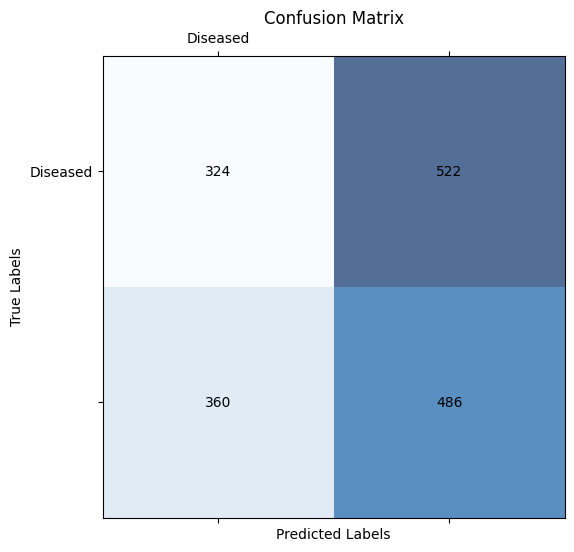

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Evaluate the model on the validation se

# Predict the classes for validation data
y_true = val_generator.classes  # True labels
y_pred = model.predict(val_generator, verbose=1)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap='Blues', alpha=0.7)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(['Non-Diseased', 'Diseased'])
ax.set_yticklabels(['Non-Diseased', 'Diseased'])
plt.title("Confusion Matrix")
plt.show()
